In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt

In [28]:
df=pd.read_csv('gas_turbine.csv')

In [29]:
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   

        CO     NOX  year  
0  0.32663  81.952  2011  
1  0.44784  82.377  2011  
2  0.45144  83.776  2011  
3  0.23107  82.505  2011  
4  0.26747  82.028  2011

In [30]:
df.shape

(36733, 12)

In [31]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
year      int64
dtype: object

In [113]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
year    0
dtype: int64

## Target / Dependent Varible  'TEY'

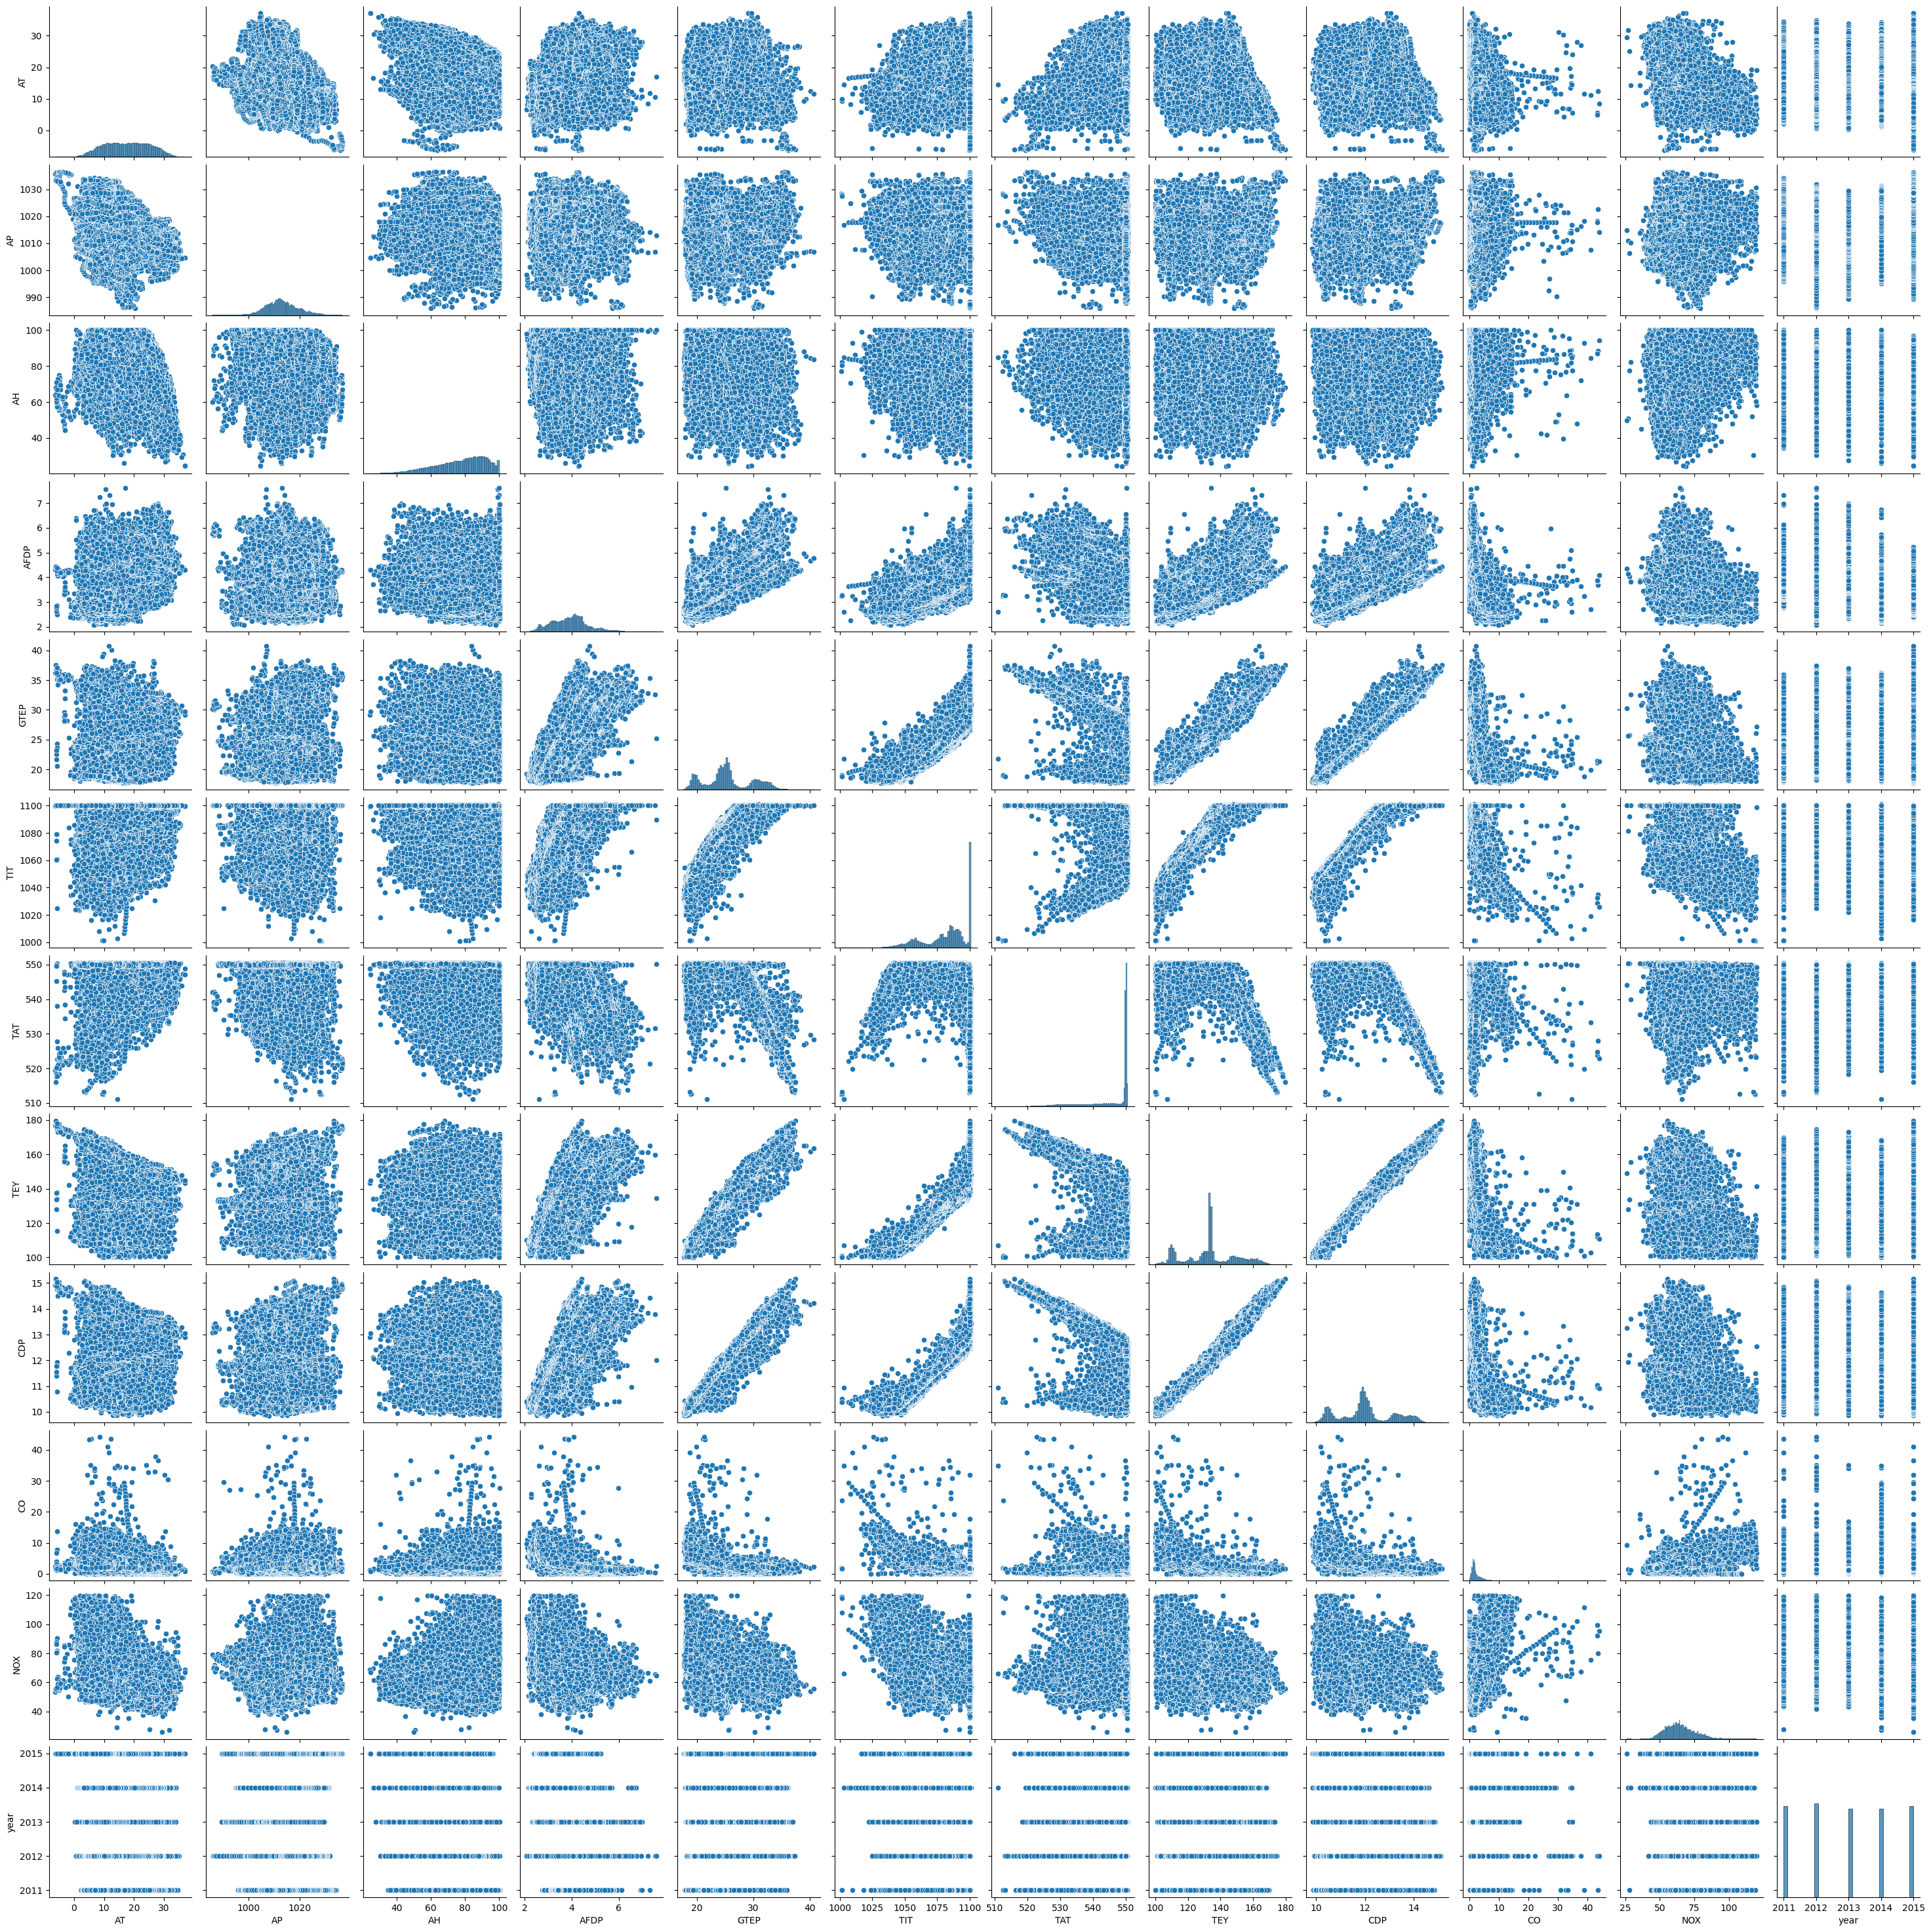

In [307]:
sns.pairplot(df)

In [38]:
corr=df.corr()

<Axes: >

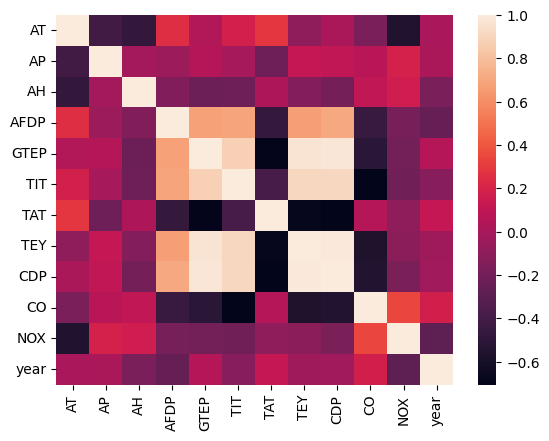

In [49]:
sns.heatmap(corr)

In [52]:
# filterd the columns based on the corelation having more tha 0.5

In [53]:
filterd_columns=corr[abs(corr.TEY) >0.5].index

# Multiple Regression using sklearn LinearRegression .....

In [225]:
X=df[filterd_columns].drop('TEY',axis=1)
y=df['TEY']

In [132]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [133]:
# splitting the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.33, random_state=45)

In [226]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [135]:
linear_model=LinearRegression()

In [136]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [137]:
linear_model.coef_

array([-1.13473993, -0.72561472,  2.0460401 , -0.76835196, 14.31829395,
       -0.40869532])

In [138]:
linear_model.intercept_

133.47620982487507

In [139]:
y_pred=linear_model.predict(X_test)

In [140]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2)

Mean Squared Error (MSE):  4.573207563769647
Mean Absolute Error (MAE):  1.7373012661054743
Root Mean Squared Error (RMSE):  2.138505918572508
R-squared (R2):  0.9812797150917905


In [141]:
# cross validation

In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
#mean accuracy for 10 folds or Accuracy
cross_val_score(linear_model,X,Y,cv=10).mean()

0.9735766759484774

In [144]:
# standard Deviation 
cross_val_score(linear_model,X,Y,cv=10).std()

0.010266041925056629

## Gradient Descent

In [145]:
# using Gradient Descent algorithm to find coefficients and intercept in sklearn 

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

#### Using GridsearchCV

In [306]:
param_grid = {'eta0': [0.0000001, 0.0001, 0.01]}

# Define SGDRegressor model
sgd = SGDRegressor(penalty=None, max_iter=100000, tol=1e-3)

# Perform grid search over parameter grid
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best learning rate:", grid_search.best_params_['eta0'])

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute performance metrics on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2)

Best learning rate: 1e-07
Mean Squared Error (MSE):  9.042720708266625
Mean Absolute Error (MAE):  2.4714797351785047
Root Mean Squared Error (RMSE):  3.007111688691763
R-squared (R2):  0.9628954424553098


In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model using SGD with batch gradient descent
sgd = SGDRegressor(penalty=None,max_iter=100, tol=1e-3,eta0=0.0000001,learning_rate='constant')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2)

Mean Squared Error (MSE):  8.646693105954585
Mean Absolute Error (MAE):  2.41837466838607
Root Mean Squared Error (RMSE):  2.940525991375452
R-squared (R2):  0.9645204433188043


In [258]:
sgd.coef_

array([-0.0463733 ,  0.52894334,  0.53444644, -0.83971562,  0.1388966 ,
       -0.23306782])

In [303]:
sgd.intercept_
sgd = SGDRegressor(penalty=None,max_iter=1000, tol=1e-3,eta0=0.000000001,learning_rate='constant')

In [304]:
r2=[]

for i in range(500):
    sgd.partial_fit(X_train,y_train)
    y_pred = sgd.predict(X_test)

    # Compute the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r = r2_score(y_test, y_pred)
    r2.append(r)

print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r)

Mean Squared Error (MSE):  11.244971830991352
Mean Absolute Error (MAE):  2.7532453884893657
Root Mean Squared Error (RMSE):  3.3533523272974692
R-squared (R2):  0.953859052175524


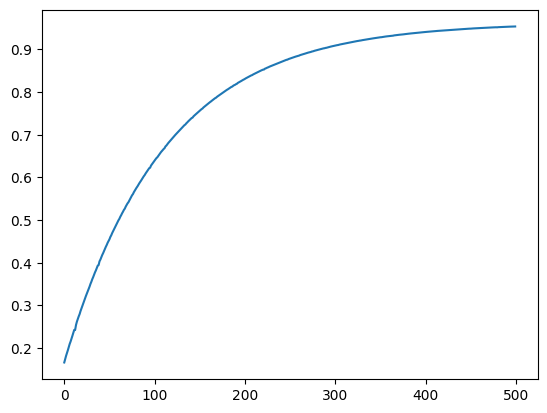

In [305]:
plt.plot(r2)